# P6- Améliorez le produit IA de votre start-up
# Partie I : TOPIC MODELING

In [2]:
import os
import pandas as pd
import numpy as np
import json
import glob
from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
from sklearn.decomposition import NMF,LatentDirichletAllocation
#pd.set_option('display.max_colwidth', None)
# for text processing 
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
#For text cleaning
import re
import string
# For time
import timeit

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Define input's directory path
path = 'C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_dataset/raw_files'

In [4]:
def get_files(filepath):
    all_files=[]
    for root,dirs,files in os.walk(filepath):
        files = glob.glob(os.path.join(root,'*.csv'))
        for f in files :
            all_files.append(os.path.abspath(f))
             
    return all_files

In [5]:
paths = get_files(path)

In [6]:
# Extract files list's names from input folder
arr= os.listdir(path)

files_name = pd.DataFrame(arr,columns=['File_name'])

In [7]:
# All files present in working directory
files_name

File_name
0  buisness.csv
1    chekin.csv
2    review.csv
3       tip.csv
4      user.csv

## Get raw files paths

In [8]:
paths

['C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\raw_files\\buisness.csv',
 'C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\raw_files\\chekin.csv',
 'C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\raw_files\\review.csv',
 'C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\raw_files\\tip.csv',
 'C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\raw_files\\user.csv']

## load raw files and prepare data : 

### business file : 

In [9]:
print('File is    :',paths[0])
df_business = pd.read_csv(paths[0],nrows=10)
df_business.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\buisness.csv


business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   

                           address           city state  postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA        93101   
1  87 Grasso Plaza Shopping Center         Affton    MO        63123   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   

                               attributes  \
0           {'ByAppointmentOnly': 'True'}   
1  {'BusinessAcceptsCreditCards': 'True'}   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   

                                               hours  
0                                                NaN  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...

### Chek-in file : 

In [10]:
print('File is    :',paths[1])
df_chek = pd.read_csv(paths[1],nrows=10)
df_chek.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\chekin.csv


business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...

### review file : 

In [11]:
print('File is    :',paths[2])
df_rev = pd.read_csv(paths[2],nrows=10)
df_rev.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\review.csv


review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18

### Tip file :

In [12]:
print('File is    :',paths[3])
df_tip = pd.read_csv(paths[3],nrows=10)
df_tip.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\tip.csv


user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   
1  NBN4MgHP9D3cw--SnauTkA  QoezRbYQncpRqyrLH6Iqjg   

                                                text                 date  \
0                     Avengers time with the ladies.  2012-05-18 02:17:21   
1  They have lots of good deserts and tasty cuban...  2013-02-05 18:35:10   

   compliment_count  
0                 0  
1                 0

### User file :

In [13]:
print('File is    :',paths[4])
df_user = pd.read_csv(paths[4],nrows=1)
df_user.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\user.csv


user_id    name  review_count        yelping_since  useful  \
0  qVc8ODYU5SZjKXVBgXdI7w  Walker           585  2007-01-25 16:47:26    7217   

   funny  cool  elite                                            friends  \
0   1259  5994   2007  NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...   

   fans  ...  compliment_more  compliment_profile  compliment_cute  \
0   267  ...               65                  55               56   

   compliment_list  compliment_note  compliment_plain  compliment_cool  \
0               18              232               844              467   

   compliment_funny  compliment_writer  compliment_photos  
0               467                239                180  

[1 rows x 22 columns]

## Conclusion on raw data and which we are going to use : 
Les fichiers a utiliser sont :

    1- df_business : source of business_ids (contains not only restauration)
    
    2- df_review : holds all reviews to be studied

### Load Dataframe 'df_buisness' and extract rows related to restauration only:

In [14]:
print('File is    :',paths[0])
df_business = pd.read_csv(paths[0])
print('df_business shape   :',df_business.shape)
df_business.head(2)

File is    : C:\Users\AMC\Desktop\Still_on_P\Projet - 06 - En cours\yelp_dataset\raw_files\buisness.csv
df_business shape   : (150346, 14)


business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   

                               attributes  \
0           {'ByAppointmentOnly': 'True'}   
1  {'BusinessAcceptsCreditCards': 'True'}   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   

                                               hours  
0                                                NaN  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...

In [15]:
df_business = df_business.convert_dtypes()
df_business['categories']=df_business['categories'].str.lower()

### Define keywords related to restauration activity to extract coressponding business_ids

In [19]:
df_buz = df_business[df_business['categories'].str.contains('restaurant|food|vegan|pizza|burger|sandwich|vegetarian|fastfood')]

In [20]:
df_buz.shape

(64629, 14)

In [21]:
df_tip.user_id.duplicated().sum()

0

In [22]:
df_tip.business_id.duplicated().sum()

0

In [23]:
df_tip.text.duplicated().sum()

0

In [24]:
df_tip.duplicated(subset=['user_id','business_id','date','text']).sum()

0

In [25]:
df_tip.business_id.value_counts()

3uLgwr0qeCNMjKenHJwPGQ    1
QoezRbYQncpRqyrLH6Iqjg    1
MYoRNLb5chwjQe3c_k37Gg    1
hV-bABTK-glh5wj31ps_Jw    1
_uN0OudeJ3Zl_tf6nxg5ww    1
7Rm9Ba50bw23KTA8RedZYg    1
kH-0iXqkL7b8UXNpguBMKg    1
jtri188kuhe_AuEOJ51U_A    1
xODBZmX4EmlVvbqtKN7YKg    1
pICJRcyqW1cF96Q3XhLSbw    1
Name: business_id, dtype: int64

In [26]:
df_tip.user_id.value_counts()

AGNUgVwnZUey3gcPCJ76iw    1
NBN4MgHP9D3cw--SnauTkA    1
-copOvldyKh1qr-vzkDEvw    1
FjMQVZjSqY8syIO-53KFKw    1
ld0AperBXk1h6UbqmM80zw    1
trf3Qcz8qvCDKXiTgjUcEg    1
SMGAlRjyfuYu-c-22zIyOg    1
YVBB9g23nuVJ0u44zK0pSA    1
VL12EhEdT4OWqGq0nIqkzw    1
4ay-fdVks5WMerYL_htkGQ    1
Name: user_id, dtype: int64

In [27]:
df_tip.compliment_count.value_counts()

0    10
Name: compliment_count, dtype: int64

### Load only bad review extracted from original file :
### Bad reviews are all reviews with notation stars equal to '1'

In [28]:
df_br = pd.read_csv('C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_dataset/review_bad_coms/bad_com_1.csv')

In [29]:
df_br.shape

(688516, 10)

In [30]:
df_br.head(1)

review_id                 user_id             business_id  \
0  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   

   stars  useful  funny  cool  \
0      1       1      2     1   

                                                text                 date  \
0  I am a long term frequent customer of this est...  2015-09-23 23:10:31   

   status  
0       1

In [31]:
df_buz.head(1)

business_id                name      address          city  \
3  MTSW4McQd7CbVtyjqoe9mw  St Honore Pastries  935 Race St  Philadelphia   

  state postal_code   latitude  longitude  stars  review_count  is_open  \
3    PA       19107  39.955505 -75.155564    4.0            80        1   

                                          attributes  \
3  {'RestaurantsDelivery': 'False', 'OutdoorSeati...   

                                          categories  \
3  restaurants, food, bubble tea, coffee & tea, b...   

                                               hours  
3  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...

In [32]:
business_list = list(df_buz['business_id'])

In [33]:
len(business_list)

64629

In [34]:
df_br.shape

(688516, 10)

In [35]:
df_br.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'status'],
      dtype='object')

### Divide original dataframe to avoid  memory issues when running
### check if all reviews are related to df_buz 'business_id'' 

In [36]:
df_br_01 = df_br[0:100000]

In [37]:
df_br_02 = df_br[100000:200000]

In [38]:
df_br_03 = df_br[200000:300000]

In [39]:
df_br_04 = df_br[300000:400000]

In [40]:
df_br_05 = df_br[500000:600000]

In [41]:
df_br_06 = df_br[600000:688516]

In [ ]:
--------------------------------

In [129]:
def list_check(df,col,list_):
    start = timeit.timeit()
    steps = [1000,5000,7000,10000,20000,30000,40000,50000,70000,85000,95000]
    i=0
    print("hello, work in progress...")
    for x in df[col]:
        if x in list_:
            df['status']=1
            i=i+1
            if i in steps:
                tt = timeit.timeit()
                print('step reached   :',i,'______Time elapsed   :',tt-start)
            else :
                i=i
            
        else :
            df['status']=0
            i=i+1
            if i in steps:
                tt = timeit.timeit()
                print('step reached   :',i,'______Time elapsed   :',tt-start)
            else :
                i=i

    end = timeit.timeit()
    x = end-start
    print ('elapsed time   :',x)
    return df.head(2)

In [126]:
list_check(df_br_01,'business_id',business_list)

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\753484186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\753484186.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0


step reached   : 1000 ______Time elapsed   : -0.0016028000027290545
step reached   : 5000 ______Time elapsed   : -7.439999899361283e-05
step reached   : 7000 ______Time elapsed   : -0.0010694000011426397
step reached   : 10000 ______Time elapsed   : 0.003304499994555954
step reached   : 20000 ______Time elapsed   : -0.0009907000057864934
step reached   : 50000 ______Time elapsed   : -0.001119499997003004
step reached   : 70000 ______Time elapsed   : -0.0008104000007733703
step reached   : 85000 ______Time elapsed   : -0.0008177999989129603
step reached   : 95000 ______Time elapsed   : -0.0008166999978129752
elapsed time   : -0.0008137000040733255


review_id                 user_id             business_id  \
0      JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
1      TcCcHzc3L6Aboq3DteEfZA  OuatwND396ZQxm2zK8WlUQ  jNL5KUPz2-tHUJM__ysSaw   
2      qdzNocGBnh8U-cvE_N8qbA  Fq7d14GDAsGjDoojP_ygOQ  pAgtmlIGqFYaWdBoCUeitw   
3      PDHRlnEdkEcwATry4w71PQ  UsBxLh14sUpO8SdeqIiGOA  Wy8Hswf2cLQGRZN6armkag   
4      5obXxR0b94b5q6j1zYCAzw  3inG_FUhm28tUJc0zZ2fCg  aY_n9RSaD2Yw09jSFFePew   
...                       ...                     ...                     ...   
99995  ybXRRuHGfMs5kT3pPqLF2Q  ur_twNxgihI8wI2zNeI-xg  ULbd1Bjuvns732BhhWJv3Q   
99996  J6A8gnS-coLdGSvd2zsgmg  laKqD_UUU5rox6mARvQggQ  SIoCIxjn4jLt2O-4DajWJw   
99997  6R-JWbPRqxkncTA3CyQQqQ  Wxbk2CemV8v6dA7WMP5yCg  a7ntsLR4kQX7zpcVgpANgw   
99998  GUB3J8dDZ-3EJ4kH9ARj1w  N26YdWNi8ZBg238ykpci0Q  FKrP06TDAKtxNG1vrRQcQQ   
99999  GxuJ8vsRVElRFzgX8nVbcQ  e2RFrIKPX0NmSvugir8a9g  _5aUqcRlSkRV32ik88xSKg   

       stars  useful  funny  cool  \
0          1       1      2     1   
1          1       1      0     0   
2          1       3      0     0   
3          1       1      0     0   
4          1       0      0     0   
...      ...     ...    ...   ...   
99995      1       1      0     0   
99996      1       0      1     0   
99997      1       0      0     0   
99998      1       0      0     0   
99999      1       0      0     0   

                                                    text                 date  \
0      I am a long term frequent customer of this est...  2015-09-23 23:10:31   
1      If you want to pay for everything a la carte t...  2014-08-24 20:14:12   
2      The TV shows are $4.99 and they have commercia...  2012-12-04 02:40:49   
3      If I could give it a zero, I would. I order a ...  2011-08-24 23:07:08   
4      We visited once and were very disappointed in ...  2017-08-16 15:43:19   
...                                                  ...                  ...   
99995  Too many people for only being open 3.5 hours....  2020-10-19 09:03:01   
99996  Rude bartenders!!! Simply asked what a shot th...  2019-03-16 20:32:16   
99997  They would not send a person out to give estim...  2012-08-19 01:44:46   
99998  I came in at 12:04AM. No one would greet or se...  2016-04-30 06:46:49   
99999  They don't listen to deliver instructions. Min...  2021-11-11 14:11:31   

       status  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
99995       1  
99996       1  
99997       1  
99998       1  
99999       1  

[100000 rows x 10 columns]

In [127]:
df_br_01['status'].value_counts()

1    100000
Name: status, dtype: int64

In [130]:
list_check(df_br_02,'business_id',business_list)
df_br_02['status'].value_counts()

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1


step reached   : 1000 ______Time elapsed   : -0.002122699996107258
step reached   : 5000 ______Time elapsed   : -0.0017789999983506277
step reached   : 7000 ______Time elapsed   : -0.0020069999955012463
step reached   : 10000 ______Time elapsed   : -0.0022622999968007207
step reached   : 20000 ______Time elapsed   : -0.001969299999473151
step reached   : 30000 ______Time elapsed   : -0.002270899996801745
step reached   : 40000 ______Time elapsed   : -0.0019378999932087027
step reached   : 50000 ______Time elapsed   : -0.001954399995156564
step reached   : 70000 ______Time elapsed   : -0.0025393999967491254
step reached   : 85000 ______Time elapsed   : -0.0015985999998520128
step reached   : 95000 ______Time elapsed   : -0.001883999997517094
elapsed time   : -0.0018265999970026314


0    100000
Name: status, dtype: int64

In [131]:
list_check(df_br_03,'business_id',business_list)
df_br_03['status'].value_counts()

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0


step reached   : 1000 ______Time elapsed   : 0.0006615000020246953
step reached   : 5000 ______Time elapsed   : 0.0006318000014289282
step reached   : 7000 ______Time elapsed   : -2.1299994841683656e-05
step reached   : 10000 ______Time elapsed   : -0.00013689999468624592
step reached   : 20000 ______Time elapsed   : -0.00012289999722270295
step reached   : 30000 ______Time elapsed   : -0.00038279998989310116
step reached   : 40000 ______Time elapsed   : -4.8499998229090124e-05
step reached   : 50000 ______Time elapsed   : 0.0009543000051053241
step reached   : 70000 ______Time elapsed   : -0.0002423999976599589
step reached   : 85000 ______Time elapsed   : 0.00011290000838926062
step reached   : 95000 ______Time elapsed   : -0.00022659999376628548
elapsed time   : 0.00021660000493284315


0    100000
Name: status, dtype: int64

In [132]:
list_check(df_br_04,'business_id',business_list)
df_br_04['status'].value_counts()

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1


step reached   : 1000 ______Time elapsed   : 0.001517299999250099
step reached   : 5000 ______Time elapsed   : -0.000870000003487803
step reached   : 7000 ______Time elapsed   : -0.0017582000000402331
step reached   : 10000 ______Time elapsed   : -0.002060999999230262
step reached   : 20000 ______Time elapsed   : 0.0029313999984879047
step reached   : 30000 ______Time elapsed   : -0.0017479000016464852
step reached   : 40000 ______Time elapsed   : -0.001593700006196741
step reached   : 50000 ______Time elapsed   : 0.0010341999950469472
step reached   : 70000 ______Time elapsed   : -0.0014775000017834827
step reached   : 85000 ______Time elapsed   : -0.0016882000054465607
step reached   : 95000 ______Time elapsed   : -0.0017876000056276098
elapsed time   : -0.0017260000022361055


1    100000
Name: status, dtype: int64

In [133]:
list_check(df_br_05,'business_id',business_list)
df_br_05['status'].value_counts()

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0


step reached   : 1000 ______Time elapsed   : -0.0009442000009585172
step reached   : 5000 ______Time elapsed   : -0.0004078999991179444
step reached   : 7000 ______Time elapsed   : -0.0006624999950872734
step reached   : 10000 ______Time elapsed   : -0.0007686999961151741
step reached   : 20000 ______Time elapsed   : 0.0014458000005106442
step reached   : 30000 ______Time elapsed   : -0.0008229000013670884
step reached   : 40000 ______Time elapsed   : -0.00019780000002356246
step reached   : 50000 ______Time elapsed   : -0.0010274000014760531
step reached   : 70000 ______Time elapsed   : -0.0007748000061837956
step reached   : 85000 ______Time elapsed   : -0.0005078999965917319
step reached   : 95000 ______Time elapsed   : -0.0007763000030536205
elapsed time   : -0.0008039000022108667


1    100000
Name: status, dtype: int64

In [134]:
list_check(df_br_06,'business_id',business_list)
df_br_06['status'].value_counts()

hello, work in progress...


C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=0
C:\Users\AMC\AppData\Local\Temp\ipykernel_16672\457762574.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status']=1


step reached   : 1000 ______Time elapsed   : -0.00023770000552758574
step reached   : 5000 ______Time elapsed   : 0.0015365999934147112
step reached   : 7000 ______Time elapsed   : -0.0002314000012120232
step reached   : 10000 ______Time elapsed   : -0.00019939999765483662
step reached   : 20000 ______Time elapsed   : 0.0035212000002502464
step reached   : 30000 ______Time elapsed   : -0.00011330001143505797
step reached   : 40000 ______Time elapsed   : 0.0013270999988890253
step reached   : 50000 ______Time elapsed   : 0.004369499998574611
step reached   : 70000 ______Time elapsed   : 0.0009434000021428801
step reached   : 85000 ______Time elapsed   : 9.49999230215326e-06
elapsed time   : 0.0034449999875505455


1    88516
Name: status, dtype: int64

### conclusion : 

1- we have not to consider rows contained on df_br_02 et df_br_03

2- we concatenate the rest of df_br(i) to get final dataframe for use. 

In [135]:
df_br['stars'].value_counts()

1    688516
Name: stars, dtype: int64

In [44]:
frames = [df_br_01,df_br_04,df_br_05,df_br_06]

In [78]:
df_br = pd.concat(frames)

In [79]:
# updating the index
df_br.reset_index(drop=True).head(5)

review_id                 user_id             business_id  \
0  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
1  TcCcHzc3L6Aboq3DteEfZA  OuatwND396ZQxm2zK8WlUQ  jNL5KUPz2-tHUJM__ysSaw   
2  qdzNocGBnh8U-cvE_N8qbA  Fq7d14GDAsGjDoojP_ygOQ  pAgtmlIGqFYaWdBoCUeitw   
3  PDHRlnEdkEcwATry4w71PQ  UsBxLh14sUpO8SdeqIiGOA  Wy8Hswf2cLQGRZN6armkag   
4  5obXxR0b94b5q6j1zYCAzw  3inG_FUhm28tUJc0zZ2fCg  aY_n9RSaD2Yw09jSFFePew   

   stars  useful  funny  cool  \
0      1       1      2     1   
1      1       1      0     0   
2      1       3      0     0   
3      1       1      0     0   
4      1       0      0     0   

                                                text                 date  \
0  I am a long term frequent customer of this est...  2015-09-23 23:10:31   
1  If you want to pay for everything a la carte t...  2014-08-24 20:14:12   
2  The TV shows are $4.99 and they have commercia...  2012-12-04 02:40:49   
3  If I could give it a zero, I would. I order a ...  2011-08-24 23:07:08   
4  We visited once and were very disappointed in ...  2017-08-16 15:43:19   

   status  
0       1  
1       1  
2       1  
3       1  
4       1

In [80]:
df_br.shape

(388516, 10)

In [81]:
# Save file after first processing
df_br.to_csv('df_br_bad_comments.csv')

## Data cleaning and processing :

In [58]:
df_br = pd.read_csv('df_br_bad_comments.csv')

In [59]:
df_br = df_br.convert_dtypes()

In [60]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388516 entries, 0 to 388515
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   388516 non-null  Int64 
 1   review_id    388516 non-null  string
 2   user_id      388516 non-null  string
 3   business_id  388516 non-null  string
 4   stars        388516 non-null  Int64 
 5   useful       388516 non-null  Int64 
 6   funny        388516 non-null  Int64 
 7   cool         388516 non-null  Int64 
 8   text         388516 non-null  string
 9   date         388516 non-null  string
 10  status       388516 non-null  Int64 
dtypes: Int64(6), string(5)
memory usage: 34.8 MB


In [61]:
# Apply lower case to all words
df_br['text'] = df_br['text'].str.lower()
# Clean text from special characters
tt= []
for x in df_br['text']:
    x = re.sub(r'[^\w\s]','',x)
    #x = re.sub('\[.*?\]', ' ', x)
    #x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    #x = re.sub(r'\w*\d\w*', ' ', x)
    #x = re.sub('?', '', x) 
    tt.append(x)

df_br['text'] =tt
print('***************Cleaning ok')
print(df_br['text'].head(2))
del tt

***************Cleaning ok
0    i am a long term frequent customer of this est...
1    if you want to pay for everything a la carte t...
Name: text, dtype: object


In [62]:
## Creating new specific list of stopwords
stop_words = stopwords.words('english')
new_stopwords = ["came","didnt","dont","ordered","would","called", "wasnt","told", "said", "giant","ring","asked", "daily","car","tire","vehicule","dealership","drive","rental","nail","nails","polish","pedicure","manicure","acrylic","ve","came""00","000","01","010","02","025","04","05","050","06","10","15","20","30","room","mechanic","bolt","get","back","go","even","shoes","could","00","100","1000","10000","100000","1000am","1000pm","100k","100pm","Giant"]
stop_words.extend(new_stopwords)

In [63]:
## tokenization and Removing stop words
tt= []
for x in df_br['text']:
    x= nltk.word_tokenize(x)
    x= [w for w in x if not w in stop_words]
    tt.append(x)

df_br['text'] = tt
print('***************Tokenization & Stop-words removed ok')
print(df_br['text'].head(2))
del tt

***************Tokenization & Stop-words removed ok
0    [long, term, frequent, customer, establishment...
1    [want, pay, everything, la, carte, place, food...
Name: text, dtype: object


In [64]:
lemmatizer = WordNetLemmatizer()

In [65]:
## Apply lemmatization according to english languages
tt=[]
for x in df_br['text']:
    ee=[]
    for word in x :
            ee.append(lemmatizer.lemmatize(word))
            
    tt.append(ee)
df_br['text'] = tt
print('***************Lemmatization ok')
print(df_br['text'].head(2))
del tt

***************Lemmatization ok
0    [long, term, frequent, customer, establishment...
1    [want, pay, everything, la, carte, place, food...
Name: text, dtype: object


In [66]:
# Save file after first processing
df_br.to_csv('df_br_treated_last.csv')

##  Buiding NMF Model for topics extraction:

In [67]:
# Reload the file with original comments to be displayed when needed
df_br = pd.read_csv('df_br_bad_comments.csv')
df_br.drop(['user_id','useful','funny','cool'],axis=1,inplace=True)

In [68]:
df = pd.read_csv('df_br_treated_last.csv')
df.drop(['user_id','useful','funny','cool'],axis=1,inplace=True)

In [69]:
df.head(3)

Unnamed: 0.1  Unnamed: 0               review_id             business_id  \
0             0           0  JrIxlS1TzJ-iCu79ul40cQ  04UD14gamNjLY0IDYVhHJg   
1             1           1  TcCcHzc3L6Aboq3DteEfZA  jNL5KUPz2-tHUJM__ysSaw   
2             2           2  qdzNocGBnh8U-cvE_N8qbA  pAgtmlIGqFYaWdBoCUeitw   

   stars                                               text  \
0      1  ['long', 'term', 'frequent', 'customer', 'esta...   
1      1  ['want', 'pay', 'everything', 'la', 'carte', '...   
2      1  ['tv', 'show', '499', 'commercial', 'cheesy', ...   

                  date  status  
0  2015-09-23 23:10:31       1  
1  2014-08-24 20:14:12       1  
2  2012-12-04 02:40:49       1

In [80]:
# use tfidf 
vect = TfidfVectorizer(min_df=50)
# Fit and transform
X = vect.fit_transform(df.text)

##  Final topics : 

In [81]:
X.shape

(388516, 13044)

In [97]:
# Create an NMF instance: model
# The 10 components will be the topics
model = NMF(n_components=5, random_state=0)

In [98]:
# Fit the model to TF-IDF
model.fit(X)

C:\Users\AMC\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=5, random_state=0)

In [99]:
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [100]:
#check the dimensions of the 3 tables
X.shape,nmf_features.shape,model.components_.shape

((388516, 13044), (388516, 5), (5, 13044))

In [101]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

C:\Users\AMC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


100      100x       101      1010      1012      1014      1015  \
0  0.005341  0.000931  0.008909  0.004721  0.004136  0.002717  0.009966   
1  0.000306  0.002248  0.001772  0.003026  0.001216  0.000000  0.000000   
2  0.000000  0.000000  0.001717  0.003742  0.004471  0.000380  0.063479   
3  0.000000  0.000000  0.000000  0.000581  0.000279  0.000066  0.000000   
4  0.000000  0.000841  0.004911  0.002644  0.000000  0.000000  0.000000   

        102      1020      1025  ...       zen      zero       zip    zipper  \
0  0.004527  0.004233  0.002344  ...  0.002091  0.182085  0.013943  0.009269   
1  0.000000  0.000000  0.000056  ...  0.001369  0.058743  0.000000  0.000000   
2  0.000418  0.008648  0.001523  ...  0.000728  0.019143  0.000000  0.000000   
3  0.000311  0.002310  0.000000  ...  0.000000  0.024222  0.000375  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.219889  0.000873  0.000000   

       ziti    zombie      zone       zoo      zoom  zucchini  
0  0.000000  0.004794  0.019961  0.009730  0.005576  0.000000  
1  0.006993  0.002510  0.001670  0.004964  0.000000  0.015439  
2  0.000000  0.001173  0.002489  0.000000  0.000000  0.000000  
3  0.007457  0.000019  0.001802  0.000000  0.000574  0.000840  
4  0.000000  0.000863  0.000272  0.000000  0.000000  0.000000  

[5 rows x 13044 columns]

In [102]:
components_df.idxmax(axis = 1)

0       time
1       food
2      order
3      pizza
4    service
dtype: object

In [103]:
#We have created the 10 topics using NMF. Let’s have a look at the 10 more important words for each topic
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    #print(tmp.nlargest(3))
    x=pd.DataFrame(tmp.nlargest(5))
    display(x)
    print('Review related to review    : ***',x.index[0],'***      with a specific weight   :**',x[topic][0])
    display(df.text[components_df.columns.get_loc(x.index[0])])
    print('****************************************************************************************************************************************')
    print('Original review ___________')
    display(df_br.text[components_df.columns.get_loc(x.index[0])])
    print('\n')

For topic 1 the words with the highest value are:


0
time     1.791017
day      1.597700
call     1.557296
one      1.432448
company  1.060812

Review related to review    : *** time ***      with a specific weight   :** 1.7910171378470559


"['st', 'louis', 'kc', 'stopped', 'calecos', 'rumored', 'authentic', 'st', 'louis', 'dish', 'bad', 'idea', 'clean', 'friendly', 'server', 'food', 'good', 'greasy', 'spoon', 'italian', 'famous', 'gooey', 'butter', 'cake', 'tasted', 'like', 'cooked', 'last', 'year', 'lasagna', 'pan', 'ick']"

****************************************************************************************************************************************
Original review ___________


'We were in St. Louis from KC, and stopped at Caleco\'s because it was rumored to have authentic St. Louis dishes. Bad idea. Not clean. Not friendly servers. The food was not good, more of greasy spoon than Italian. And the "famous" gooey butter cake tasted like it was cooked in last year\'s lasagna pan. Ick.'



For topic 2 the words with the highest value are:


1
food     3.878075
place    1.706969
good     1.435786
chicken  1.390921
like     1.241856

Review related to review    : *** food ***      with a specific weight   :** 3.8780754379001268


"['second', 'chance', 'anthony', 'never', 'return', 'time', 'pizza', 'dry', 'cooked', 'salad', 'incomplete', 'best', 'pricey', 'definitely', 'worth', 'sad', 'live', 'close']"

****************************************************************************************************************************************
Original review ___________


'This was The "second chance" for Anthony\'s  and I will never return.  Both times the pizza was very dry and over cooked. The salad was incomplete at best! Pricey and DEFINITELY not worth it! Sad because I live so close!'



For topic 3 the words with the highest value are:


2
order   2.969299
minute  2.708445
table   1.935044
drink   1.480024
waited  1.288419

Review related to review    : *** order ***      with a specific weight   :** 2.9692991374902653


"['normally', 'write', 'negative', 'review', 'experience', 'particularly', 'disappointing', 'went', 'nox', 'husband', 'two', 'week', 'ago', 'stopping', 'work', 'romantic', 'relaxing', 'evening', 'sat', 'patio', 'modern', 'inviting', 'hostess', 'extremely', 'courteous', 'chatted', 'u', 'minute', 'waited', 'server', 'stephen', 'first', 'seemed', 'quiet', 'experience', 'continued', 'seemed', 'attitude', 'u', 'felt', 'though', 'speaking', 'u', 'condescending', 'manner', 'like', 'werent', 'good', 'enough', 'dining', 'establishment', 'later', 'overheard', 'confrontation', 'coworker', 'seemed', 'snap', 'nowhere', 'made', 'husband', 'extremely', 'uncomfortable', 'needle', 'say', 'left', 'shortly', 'dispute', 'occurred', 'although', 'food', 'wonderful', 'dining', 'nox']"

****************************************************************************************************************************************
Original review ___________


"I don't normally write negative reviews, but my experience was particularly disappointing here. I went to Nox with my husband two weeks ago. We were stopping by after work for a romantic, relaxing evening out. We sat on their patio, which was very modern and inviting. The hostess was extremely courteous and chatted with us for a few minutes while we waited for our server, Stephen. At first, he seemed quiet, but as our experience continued he seemed to have more of an attitude with us. We felt as though he was speaking to us in a condescending manner, like we weren't good enough to be dining at this establishment. Later on, we overheard him having a confrontation with a coworker. He seemed to snap at her out of nowhere, and this made my husband and I extremely uncomfortable. Needless to say, we left shortly after the dispute occurred. Although the food was wonderful, we will not be dining at Nox again."



For topic 4 the words with the highest value are:


3
pizza     5.578733
order     0.892017
cheese    0.704165
delivery  0.681486
crust     0.477019

Review related to review    : *** pizza ***      with a specific weight   :** 5.5787325444127305


"['got', 'grubhub', 'delivery', 'sushi', 'inedible', 'lunch', 'special', 'three', 'roll', 'brown', 'rice', 'brown', 'rice', 'mush', 'raw', 'fish', 'warm', 'wet', 'tried', 'couple', 'piece', 'weird', 'plastic', 'taste', 'threw', 'rest', 'ive', 'exact', 'thing', 'great', 'disappointed', 'wasted']"

****************************************************************************************************************************************
Original review ___________


'I just got a grubhub delivery and the sushi is inedible. I ordered the lunch special three rolls with brown rice. The brown rice was mush and the raw fish was warm and wet. I tried a couple pieces and all had a weird plastic taste. I threw the rest out. Ive ordered the exact thing before and it was great. So disappointed that i wasted $15.'



For topic 5 the words with the highest value are:


4
service   3.962450
customer  3.009257
rude      1.598897
worst     1.352650
horrible  1.327708

Review related to review    : *** service ***      with a specific weight   :** 3.9624499714844936


"['sweat', 'better', 'gym', 'planet', 'fitness', 'better', 'deal', 'overall', 'gym', 'decent', 'member', 'however', 'equipment', 'broken', 'took', 'least', 'day', 'fix', 'watch', 'hidden', 'fee', 'fine', 'print', 'contract', 'tried', 'cancel', 'membership', 'expected', 'early', 'cancellation', 'fee', 'staff', 'desk', 'unknowledgeable', 'couldnt', 'actually', 'help', 'cancel', 'membership', 'ended', 'pay', 'extra', 'month', 'top', 'hidden', 'sign', 'fee', 'fee', 'keep', 'monthly', 'due', 'locked', 'monthly', 'due', 'etc', 'staff', 'quick', 'blame', 'staff', 'claim', 'responsibility', 'led', 'transferred', 'empty', 'voicemail', 'call', 'back', 'stay', 'away']"

****************************************************************************************************************************************
Original review ___________


"Go to Sweat for a better gym and Planet Fitness for a better deal. Overall this gym was decent while I was a member. However, when equipment was broken it took them at least 10 days to fix it. Watch out for hidden fees and fine print on their contracts. When I tried to cancel my membership I expected an early cancellation fee but the staff at their desk were so unknowledgeable they couldn't actually help me cancel my membership, and I ended up having to pay an extra month on top of the hidden sign up fee, fee to keep your monthly dues locked in, monthly dues etc. Staff were all quick to blame other staff or claim that it wasn't their responsibility which led to being transferred to empty voicemail with no call backs. Stay away!"

In [110]:
df_br['text'] = df_br['text'].str.lower()

In [ ]:
# Topic 0 : time 

In [111]:
df_topic_0 = df_br[df_br['text'].str.contains('time')]

In [113]:
df_topic_1 = df_br[df_br['text'].str.contains('food')]

In [114]:
df_topic_2 = df_br[df_br['text'].str.contains('order')]

In [115]:
df_topic_3 = df_br[df_br['text'].str.contains('pizza')]

In [116]:
df_topic_4 = df_br[df_br['text'].str.contains('service')]

In [118]:
df_topic_0.shape, df_topic_1.shape, df_topic_2.shape,df_topic_3.shape,df_topic_4.shape

((139919, 7), (110102, 7), (111016, 7), (15160, 7), (122507, 7))

In [ ]:
# Exploration de quelques reviews pour une meilleure comprehension

In [122]:
pd.set_option('display.max_colwidth', None)
df_topic_0['text'].head(10)

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [123]:
pd.set_option('display.max_colwidth', None)
df_topic_1['text'].head(10)

1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [124]:
pd.set_option('display.max_colwidth', None)
df_topic_2['text'].head(10)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [125]:
pd.set_option('display.max_colwidth', None)
df_topic_3['text'].head(10)

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [126]:
pd.set_option('display.max_colwidth', None)
df_topic_4['text'].head(10)

6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

# Partie II : IMAGE CLASSIFICATION
#######################################################################################################################################3

### Approche I : Image classification by SIFT features extraction  :

In [ ]:
----------------------------------------

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import glob
import time
from time import time
#For text cleaning
import re
import string
# Image processing Modules
#import cv2
import cv2
import skimage
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

In [2]:
# After transformation of json file 
photos = pd.read_csv('C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\photos.csv')

In [3]:
photos.head(3)

photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                NaN  outside  
2                                     oyster shooter    drink

In [4]:
photos.shape

(200100, 4)

In [5]:
photos.label.value_counts()

food       108152
inside      56031
outside     18569
drink       15670
menu         1678
Name: label, dtype: int64

In [6]:
# Data preparation

In [7]:
# Consider only 200 images for each category
food = photos.loc[photos.label =='food'].head(200)
inside = photos.loc[photos.label =='inside'].head(200)
outside = photos.loc[photos.label =='outside'].head(200)
drink = photos.loc[photos.label =='drink'].head(200)
menu = photos.loc[photos.label =='menu'].head(200)
# list creation 
food_list = list(food.photo_id)
inside_list = list(inside.photo_id)
outside_list = list(outside.photo_id)
drink_list = list(drink.photo_id)
menu_list = list(menu.photo_id)

In [8]:
# Define list of file names to be loaded and add extension 'jpg' for each name in lists
n_food=[]
for x in food_list:
    x = str(x)+str('.jpg')
    n_food.append(x)
n_inside=[]
for x in inside_list:
    x = str(x)+str('.jpg')
    n_inside.append(x)
n_outside=[]
for x in outside_list:
    x = str(x)+str('.jpg')
    n_outside.append(x)
n_drink=[]
for x in drink_list:
    x = str(x)+str('.jpg')
    n_drink.append(x)
n_menu=[]
for x in menu_list:
    x = str(x)+str('.jpg')
    n_menu.append(x)

In [9]:
global_list = n_food+n_inside+n_outside+n_drink+n_menu
data = pd.DataFrame(global_list,columns=['file_name'])
data['label']=''

for i, x in enumerate(data['file_name']):
    if x in n_food:
        data.loc[data.file_name == x,'label']='food'
    elif x in n_inside:
        data.loc[data.file_name == x,'label']='inside'
    elif x in n_outside:
        data.loc[data.file_name == x,'label']='outside'
    elif x in n_drink:
        data.loc[data.file_name == x,'label']='drink'
    else :
        data.loc[data.file_name == x,'label']='menu'

In [10]:
data.head(3)

file_name label
0  pve7D6NUrafHW3EAORubyw.jpg  food
1  H52Er-uBg6rNrHcReWTD2w.jpg  food
2  wZ29mUm6nKz566j17OBadw.jpg  food

In [11]:
import shutil

In [12]:
source = "C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_photos/photos/"
destination = 'C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_photos/train_cnn/'

In [13]:
for x in global_list:
    link = os.path.join(source, x)
    dest = shutil.copy(link, destination)

In [14]:
data.label.value_counts()

food       200
inside     200
outside    200
drink      200
menu       200
Name: label, dtype: int64

In [15]:
data.to_csv('labels_200.csv',index=False)

In [16]:
parent_dir =  'C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_photos/photos/'

### Making decriptors matrix :

In [17]:
sift = cv2.SIFT_create(500)

In [18]:
import time
temps1=time.time()

sift_keypoints=[]
i=0
for x in global_list:
    link = os.path.join(parent_dir, x)
    yy=cv2.imread(link,cv2.IMREAD_GRAYSCALE)
    res = cv2.equalizeHist(yy)   # equalize image histogram
    kp, des = sift.detectAndCompute(res,None)
    i=i+1
    sift_keypoints.append(des)

sift_kp_by_img = np.asarray(sift_keypoints)
sift_kp_all = np.concatenate(sift_kp_by_img,axis=0)

print()
print("Nombre de descripteurs : ", sift_kp_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")



Nombre de descripteurs :  (488573, 128)
temps de traitement SIFT descriptor :            66.00 secondes


C:\Users\AMC\AppData\Local\Temp\ipykernel_8928\2934673032.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_kp_by_img = np.asarray(sift_keypoints)


### Clusters made up : 

In [19]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_kp_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_kp_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  699
Création de 699 clusters de descripteurs ...


C:\Users\AMC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :            17.49 secondes


In [20]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des # normalisation des histograms
      
    return hist

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_kp_by_img) :
    if i%100 == 0 : print(i)
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
temps de création histogrammes :             6.28 secondes


In [21]:
len(hist_vectors)

1000

In [22]:
im_features.shape

(1000, 699)

### Dimension reduction PCA

In [23]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1000, 699)
Dimensions dataset après réduction PCA :  (1000, 543)


### T-SNE dimension reduction : T-SNE used for dimension reduction and display of results on 2D

In [24]:
import seaborn as sns

In [25]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label"]
print(df_tsne.shape)

C:\Users\AMC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 3)


In [26]:
df_tsne.head(6)

tsne1      tsne2 class
0  1.190080 -15.182307  food
1 -5.432244 -10.718520  food
2 -8.145155  -2.338403  food
3 -9.474049   6.047811  food
4 -2.987325  -6.895190  food
5 -3.154114 -13.074807  food

In [27]:
## Quick Visual analysis : T-SNE plot according to images categories :

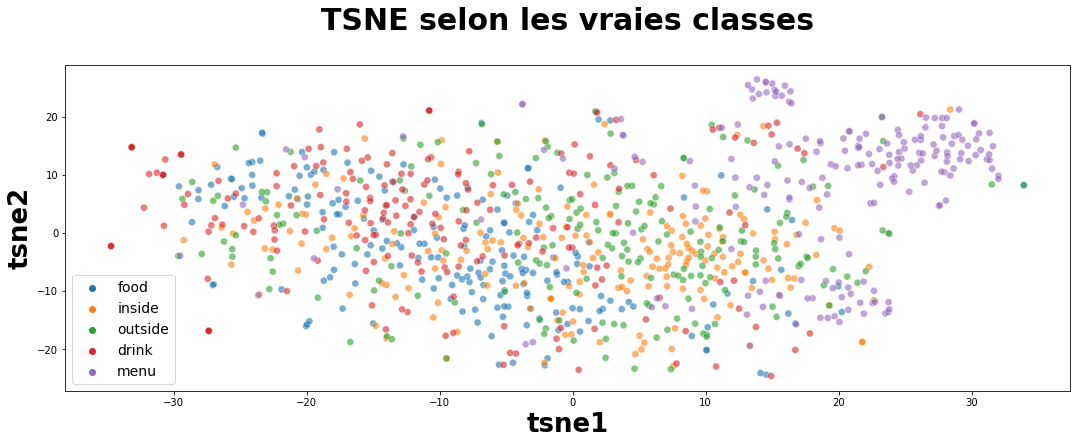

In [28]:
plt.figure(figsize=(18,6))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
     s=50, alpha=0.6)#palette=sns.color_palette('tab10', n_colors=4),

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [29]:
## measured analysis : T-SNE plot according to categories and clusters

In [30]:
# Clusters from T-SNE

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1000, 4)


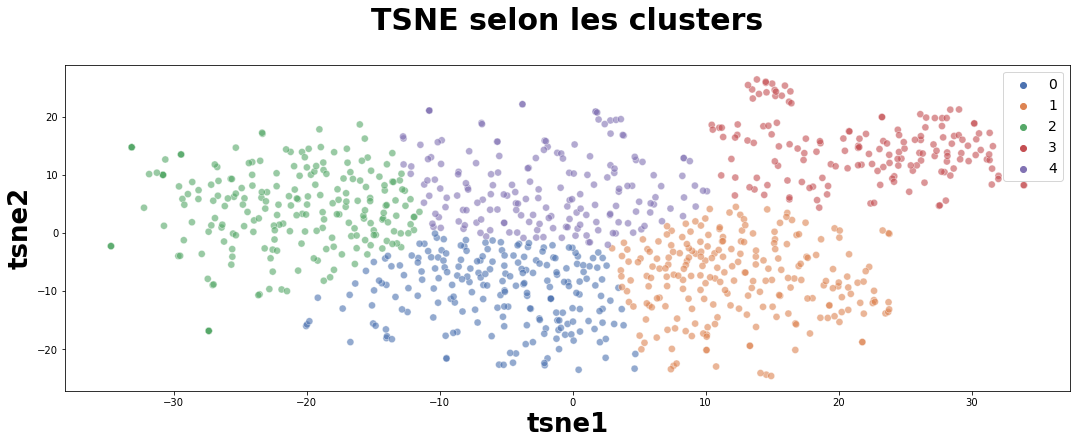

In [31]:
# plot of images according to clusters 
# ARI calculated upon image's categories / clusters
# As a result we obtained a weak ARI 
# Poor classification results with this set of data


plt.figure(figsize=(18,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette="deep",
    #palette=sns.color_palette('tab10', n_colors=4), 
    s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]

In [32]:
labels.unique()

array(['food', 'inside', 'outside', 'drink', 'menu'], dtype=object)

In [33]:
groups = {}
for file, cluster in zip(global_list,cls.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

### SCORE : 

In [34]:
# get the unique labels (from the photos_labels.csv)
df = pd.read_csv('C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\labels_200.csv')
label = df['label'].tolist()
unique_labels = list(set(label))
df['clustering']=cls.labels_

In [35]:
df.head(6)

file_name label  clustering
0  pve7D6NUrafHW3EAORubyw.jpg  food           0
1  H52Er-uBg6rNrHcReWTD2w.jpg  food           0
2  wZ29mUm6nKz566j17OBadw.jpg  food           0
3  Le9rMdT8YFlvqr431LctIQ.jpg  food           4
4  9kVdBkGWcKfCFzSwUXjQyw.jpg  food           0
5  dxIzVOEowFFsg2RmgFJZdQ.jpg  food           0

In [36]:
data

file_name label
0    pve7D6NUrafHW3EAORubyw.jpg  food
1    H52Er-uBg6rNrHcReWTD2w.jpg  food
2    wZ29mUm6nKz566j17OBadw.jpg  food
3    Le9rMdT8YFlvqr431LctIQ.jpg  food
4    9kVdBkGWcKfCFzSwUXjQyw.jpg  food
..                          ...   ...
995  RKrucTfvnq9g9epbvCazXQ.jpg  menu
996  OqwkUDdPPVDNBQbCj_NB4A.jpg  menu
997  iZP8BCcCgN3Wtss09d8TRg.jpg  menu
998  GrLa_I3shzYn_hvtHuz54A.jpg  menu
999  oAXsOzMPinlujAXcXmRTfA.jpg  menu

[1000 rows x 2 columns]

### Identification manuelle des paires : cluster/class

In [37]:
df.loc[df.label =='food']['clustering'].value_counts()

0    85
2    65
4    30
1    18
3     2
Name: clustering, dtype: int64

In [38]:
df.loc[df.label =='inside']['clustering'].value_counts()

1    84
0    50
4    33
2    29
3     4
Name: clustering, dtype: int64

In [39]:
df.loc[df.label =='outside']['clustering'].value_counts()

1    69
4    57
0    33
2    28
3    13
Name: clustering, dtype: int64

In [40]:
df.loc[df.label =='drink']['clustering'].value_counts()

2    93
0    41
4    41
1    14
3    11
Name: clustering, dtype: int64

In [41]:
df.loc[df.label =='menu']['clustering'].value_counts()

3    130
1     44
4     16
2      7
0      3
Name: clustering, dtype: int64

In [42]:
def classif(x):
    if  x==0:
        return 'food'
    elif  x==1:
        return 'inside'
    elif  x==2:
        return 'drink'
    elif  x==3:
        return 'menu'
    else :
        return 'outside'

In [43]:
df['clustering_labels']=df['clustering'].apply(classif)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [45]:
from sklearn import cluster, metrics
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.15178503874306556


In [46]:
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(df['label'], df['clustering_labels']))

Accuracy =  0.449


In [47]:
## In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on 
## the average parameter.
from sklearn.metrics import f1_score
print ("f1-score = ", metrics.f1_score(df['label'], df['clustering_labels'],average='weighted'))

f1-score =  0.4539195069594573


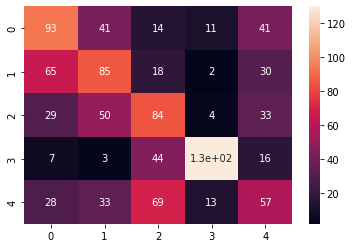

In [48]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(df['label'], df['clustering_labels'])
#print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
----------------------------------

### Approche II : Image classification by CNN features extraction :

In [49]:
# Import librairies : 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# for everything else
from random import randint
import pickle
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import keras
# models:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
# Librairies for unsupervised sementation
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.datasets.loaders import load_nfl
# usual libraries
import pandas as pd
import numpy as np
import os

### Files input : 

In [50]:
# We use 'global_list' ,'parent_dir' and  'data' defined for fist 'Volet'

In [51]:
global_list[0]

'pve7D6NUrafHW3EAORubyw.jpg'

In [52]:
parent_dir

'C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_photos/photos/'

In [53]:
data.head(2)

file_name label
0  pve7D6NUrafHW3EAORubyw.jpg  food
1  H52Er-uBg6rNrHcReWTD2w.jpg  food

### Test to load an image :

In [54]:
x = global_list[1]
path_img = os.path.join(parent_dir, x)

In [55]:
# load the image as a 224x224 array
img = load_img(path_img, target_size=(224,224))

# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)

(224, 224, 3)


In [56]:
# We reshape array of image to add the dimension that let the model know how many images we ar poviding
# (num_of_samples, rows, columns, channels)

In [57]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

(1, 224, 224, 3)


In [58]:
#The preprocess_input function is meant to adequate your image to the format the model requires
#This 'preprocess_input' is specific to model :VGG16 

In [59]:
x = preprocess_input(reshaped_img)

In [60]:
print(np.max(x))
print(np.min(x))

151.061
-123.68


### Define CNN Model : 

In [61]:
# load model
model = VGG16()

In [62]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [63]:
# remove the output layer as we are in feature extraction mode
model = Model(inputs=model.inputs, outputs=model.layers[-4].output)

In [64]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [65]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [66]:
data_cnn = {}

#p = r"C:/Users/AMC/Desktop/Still_on_P/Projet - 06 - En cours/yelp_dataset/features"

# lop through each image in the dataset
for photo in global_list:
        link = os.path.join(parent_dir, photo)
    # try to extract the features and update the dictionary
    #try:
        feat_cnn = extract_features(link,model)
        data_cnn[photo] = feat_cnn
    # if something fails, save the extracted features as a pickle file (optional)
    #except:
    #    with open(p,'wb') as file:
    #        pickle.dump(data,file)

1/1 [==============================] - 0s 237ms/step


1/1 [==============================] - 0s 243ms/step


1/1 [==============================] - 0s 251ms/step


1/1 [==============================] - 0s 237ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 248ms/step


1/1 [==============================] - 0s 251ms/step


#### output CNN

In [67]:
# get a list of the filenames
filenames = np.array(list(data_cnn.keys()))


# get a list of just the features
feat = np.array(list(data_cnn.values()))

# reshape so that there are 1000 samples of 25008 vectors
feat = feat.reshape(-1,25088)

In [68]:
feat

array([[ 0.      ,  0.      ,  0.      , ...,  0.      , 14.107786,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  6.693441,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]], dtype=float32)

In [69]:
# get the unique labels (from the photos_labels.csv)
df_c = pd.read_csv('C:\\Users\\AMC\\Desktop\\Still_on_P\\Projet - 06 - En cours\\yelp_dataset\\labels_200.csv')
label = df_c['label'].tolist()
unique_labels = list(set(label))

In [70]:
df_c.head(6)

file_name label
0  pve7D6NUrafHW3EAORubyw.jpg  food
1  H52Er-uBg6rNrHcReWTD2w.jpg  food
2  wZ29mUm6nKz566j17OBadw.jpg  food
3  Le9rMdT8YFlvqr431LctIQ.jpg  food
4  9kVdBkGWcKfCFzSwUXjQyw.jpg  food
5  dxIzVOEowFFsg2RmgFJZdQ.jpg  food

### PCA 

In [71]:
pca = PCA(n_components=543, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

### TSNE

In [72]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(x)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label"]
print(df_tsne.shape)

C:\Users\AMC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1000, 3)


In [73]:
## Visual analysis : T-SNE plot according to images categories :

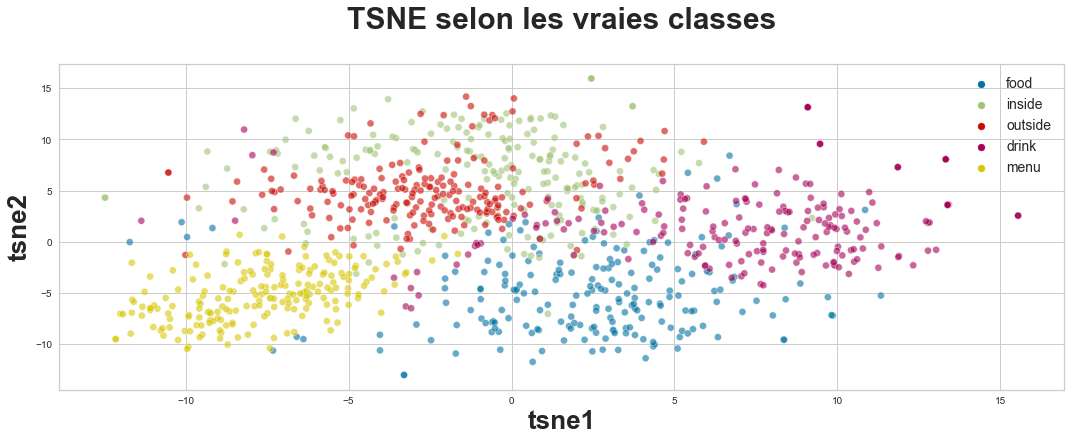

In [74]:
plt.figure(figsize=(18,6))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
     s=50, alpha=0.6)#palette=sns.color_palette('tab10', n_colors=4),

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [75]:
# Clusters from T-SNE

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=5, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1000, 4)


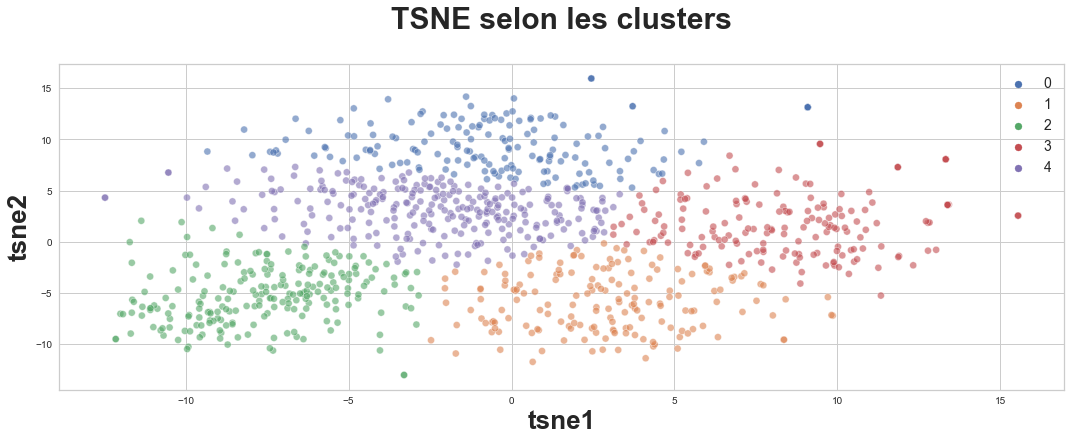

In [76]:
# plot of images according to clusters 
# ARI calculated upon image's categories / clusters
# As a result we obtained a weak ARI 
# Poor classification results with this set of data


plt.figure(figsize=(18,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette="deep",
    #palette=sns.color_palette('tab10', n_colors=4), 
    s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data["label"]

In [77]:
# kmeans.labels copy to dataframe

df_c['clustering']=cls.labels_

In [78]:
df_c

file_name label  clustering
0    pve7D6NUrafHW3EAORubyw.jpg  food           1
1    H52Er-uBg6rNrHcReWTD2w.jpg  food           1
2    wZ29mUm6nKz566j17OBadw.jpg  food           1
3    Le9rMdT8YFlvqr431LctIQ.jpg  food           1
4    9kVdBkGWcKfCFzSwUXjQyw.jpg  food           1
..                          ...   ...         ...
995  RKrucTfvnq9g9epbvCazXQ.jpg  menu           2
996  OqwkUDdPPVDNBQbCj_NB4A.jpg  menu           2
997  iZP8BCcCgN3Wtss09d8TRg.jpg  menu           2
998  GrLa_I3shzYn_hvtHuz54A.jpg  menu           2
999  oAXsOzMPinlujAXcXmRTfA.jpg  menu           2

[1000 rows x 3 columns]

In [79]:
### Identification manuelle des paires : cluster/class

In [80]:
df_c.loc[df_c.label =='food']['clustering'].value_counts()

1    157
3     16
4     15
2     12
Name: clustering, dtype: int64

In [81]:
df_c.loc[df_c.label =='inside']['clustering'].value_counts()

0    117
4     69
3      6
1      5
2      3
Name: clustering, dtype: int64

In [82]:
df_c.loc[df_c.label =='outside']['clustering'].value_counts()

4    154
0     43
2      2
1      1
Name: clustering, dtype: int64

In [83]:
df_c.loc[df_c.label =='drink']['clustering'].value_counts()

3    151
4     22
1     10
0     10
2      7
Name: clustering, dtype: int64

In [84]:
df_c.loc[df_c.label =='menu']['clustering'].value_counts()

2    194
4      6
Name: clustering, dtype: int64

In [85]:
# Reclassification des clusters :

In [86]:
def classif(x):
    if  x==0:
        return 'inside'
    elif  x==1:
        return 'food'
    elif  x==2:
        return 'menu'
    elif  x==3:
        return 'drink'
    else :
        return 'outside'

In [87]:
df_c['clustering_labels']=df_c['clustering'].apply(classif)

In [88]:
df_c.head(3)

file_name label  clustering clustering_labels
0  pve7D6NUrafHW3EAORubyw.jpg  food           1              food
1  H52Er-uBg6rNrHcReWTD2w.jpg  food           1              food
2  wZ29mUm6nKz566j17OBadw.jpg  food           1              food

### SCORE 

In [89]:
from sklearn import cluster, metrics
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.5482373766061898


In [90]:
#Print overall accuracy
print ("Accuracy = ", metrics.accuracy_score(df_c['label'], df_c['clustering_labels']))

Accuracy =  0.773


In [91]:
## In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on 
## the average parameter.
from sklearn.metrics import f1_score
print ("f1-score = ", metrics.f1_score(df_c['label'], df_c['clustering_labels'],average='weighted'))

f1-score =  0.7746161668687771


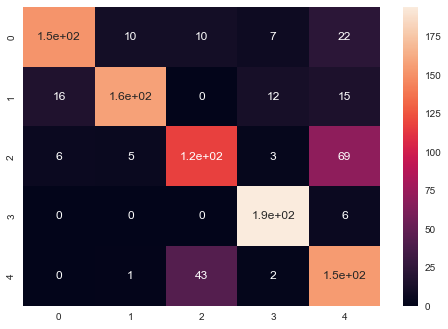

In [92]:
#Confusion Matrix - verify accuracy of each class
cm_c = confusion_matrix(df_c['label'], df_c['clustering_labels'])
#print(cm)
sns.heatmap(cm_c, annot=True)
plt.show()

# Partie 03: YELP API TO EXTRACT RESTAURANT INFO

In [132]:
import requests
from yelpapi import YelpAPI

In [133]:
from dotenv import load_dotenv
from dotenv import find_dotenv
from dotenv import dotenv_values
import os

In [134]:
# Use load_env to trace the path of .env:
load_dotenv('env.env') 

True

In [135]:
YELP_API_KEY=os.environ.get("YELP_API_KEY")

YELP_CLIENT_ID=os.environ.get("YELP_CLIENT_ID")

In [136]:
from yelpapi import YelpAPI

yelp_api = YelpAPI(YELP_API_KEY)

###  Restaurants data gathering : 

#### Business data :

In [137]:
city = ['Astoria, NY','San Diego','Utah','Idaho']
search_limit = 50 # 50 is the limit for searching
term = 'restaurant bar'

In [138]:
i = 0
for location in city :
    response = yelp_api.search_query(term = term,
                                 location = location,
                                 limit = search_limit)
    # creation of Dataframe 
    cols = list(response['businesses'][0].keys())
    data = pd.DataFrame(columns=cols) 
    # Appending all data within dataframe
    for biz in response['businesses']:
        data = data.append(biz, ignore_index=True)
    
    # Results concatenating to get one final dataframe
    if i == 0 :
        old = data.copy()
        i+=1
    elif i== 1 :
        frames_ = [old,data]
        df = pd.concat(frames_)
        i+=1
    else :
        frames_ = [df,data]
        df = pd.concat(frames_)
        i+=1

C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipyk

C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipyk

C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipyk

C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipyk

C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_416\825514760.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipyk

In [139]:
df

id                      alias                 name  \
0   W0sXHSSpkiMEDJiBmSLNYQ            trestle-astoria              Trestle   
1   _HBpi2PIG8Zxz01Pr41MIw     the-shady-lady-astoria       The Shady Lady   
2   uQ0kF3fiJFDm0oDVRaMBkw     carla-long-island-city                Carla   
3   k5bGHJbAXDw9g_uP42QqDw      the-highwater-astoria        The Highwater   
4   zgW7g4RWssKfjdlSE8fZvg        sweet-afton-astoria          Sweet Afton   
..                     ...                        ...                  ...   
45  DgaaiJq0ji-Wyx7yYLUVwQ             chilis-boise-3              Chili's   
46  sf4vifuAJgIkqYp6eUC7-g          prost-boise-boise         Prost! Boise   
47  -l3G5kG-LuiKe6Eqy3KKZw     sids-garage-meridian-2          Sids Garage   
48  k66N-4OusE74AAbUR9L1Tg            juniper-boise-2              Juniper   
49  JdhXCnAG77iY6f0TLPaQ6A  solid-grill-and-bar-boise  Solid Grill and Bar   

                                                               image_url  \
0   https://s3-media2.fl.yelpcdn.com/bphoto/OqbqzUDibIw5hLL5M2xH2A/o.jpg   
1   https://s3-media3.fl.yelpcdn.com/bphoto/79PjiSqvqypIJgv1NfwhUQ/o.jpg   
2   https://s3-media4.fl.yelpcdn.com/bphoto/BoE34winfFNgMlZ5Hnhdng/o.jpg   
3   https://s3-media1.fl.yelpcdn.com/bphoto/0TwP96PRTfM1lNRt_1zTxQ/o.jpg   
4   https://s3-media1.fl.yelpcdn.com/bphoto/7qRjy07rSq9Q62H2jQKt3w/o.jpg   
..                                                                   ...   
45  https://s3-media1.fl.yelpcdn.com/bphoto/aTxyZv5cNlhKOVY8-3Hj0g/o.jpg   
46  https://s3-media3.fl.yelpcdn.com/bphoto/jNGaRuWZfKk6zirKIQzOsA/o.jpg   
47  https://s3-media2.fl.yelpcdn.com/bphoto/zi9BbGFGqTi7pLNNaD_VYA/o.jpg   
48  https://s3-media4.fl.yelpcdn.com/bphoto/wah9JpvTiMWtRcRA5iXRjg/o.jpg   
49  https://s3-media1.fl.yelpcdn.com/bphoto/XP1MSdJ_OsmCRYjYrsq0ow/o.jpg   

   is_closed  \
0      False   
1      False   
2      False   
3      False   
4      False   
..       ...   
45     False   
46     False   
47     False   
48     False   
49     False   

                                                                                                                                                                                       url  \
0             https://www.yelp.com/biz/trestle-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
1      https://www.yelp.com/biz/the-shady-lady-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
2      https://www.yelp.com/biz/carla-long-island-city?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
3       https://www.yelp.com/biz/the-highwater-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
4         https://www.yelp.com/biz/sweet-afton-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
..                                                                                                                                                                                     ...   
45             https://www.yelp.com/biz/chilis-boise-3?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
46          https://www.yelp.com/biz/prost-boise-boise?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
47     https://www.yelp.com/biz/sids-garage-meridian-2?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=A57LwVZ5W7txZHbVlG9Tnw   
48            https://www.yelp.com/biz/juniper-boise-2?adjust_creative=A57LwVZ5W7

In [299]:
df.duplicated('id').sum()

0

In [ ]:
# We get data for 200 restaurants

In [257]:
df.shape

(200, 16)

In [314]:
# Export to csv File:
df.to_csv('API_YELP_BUSINESS_ID.csv',index=False)

#### Reviews of business we extracted : 

In [305]:
id_list = list(df['id'].head(200))

In [306]:
id_list

['W0sXHSSpkiMEDJiBmSLNYQ',
 '_HBpi2PIG8Zxz01Pr41MIw',
 'uQ0kF3fiJFDm0oDVRaMBkw',
 'k5bGHJbAXDw9g_uP42QqDw',
 'CpZ5fw9rxHOdLmdtW1Qdbw',
 'zgW7g4RWssKfjdlSE8fZvg',
 'rrsjcQVLg2PkIkO_vPjOLw',
 'AawLwOYZwMf_9wkShExfuw',
 '5ZWX85Le2vNrtAw5s9lHdQ',
 'H5bhfR5sL0I2w1csjI1uMA',
 'mWS4umRg2AyykyAClMrIRw',
 'gJmJDwrDUHy--3qS9qQFYA',
 'AUyKmFjpaVLwc3awfUnqgQ',
 'iNiq1vgWpEa48jlPAce8wQ',
 '6AJwsgXr7YwsqneGVAdgzw',
 '47_jHPl3p4-OYGCVLy2ZIA',
 '3UmRGpZsMdJx4fWCT1NxZg',
 'azOGJ8gBsP4RF2zOJTSwDg',
 'abZ-mEvF6Tj4hfyIg0lKwQ',
 '0jswXSAOU-a5VTR3n7Yebw',
 'ayOj0JXAsuGqVG8reuqpxQ',
 'Z3mYawowd-Uq-wJyASMskQ',
 'YKoQUUrUdE_XHw-ikAkumQ',
 'Sj3JYCbaEFrAqUzRrenQbg',
 'GojmCdGjUyGPxGLpoxXhvA',
 'Y98a2y3r77l7S4wVS4Vqzg',
 'yczK4BwiadrSLAhVZw87BQ',
 'l_hBcWIFx_ausYBxLkSglQ',
 'wT_-RVwMoiPAL9L191Zjvg',
 'P-XnPhzdGbgbMYIcS0cpTA',
 '1ExwosnCMtb7D3SF5ovo6w',
 '-0fjWWC2SY6kNxGfD8PKGg',
 'kzd10IXi3dTjoPw0TDj8tA',
 'UF9F0A4e7AJHzNPG5zrHUQ',
 'LBiuVnEqHa-tsmKzMZPfiQ',
 'B9aM47OiOJtoBKOGY3aMQw',
 'pL7MK_PsDtrKdBm1xLPzkg',
 

In [294]:
df['id'][0]

0    W0sXHSSpkiMEDJiBmSLNYQ
0    X8EmtgsqlB9QHJ7HH-FiIw
0    iC07-jSfyOWxKBqYH658kw
0    -T-hEoNi7KRHtKEUWeckUw
Name: id, dtype: object

In [298]:
review

{'reviews': [{'id': 'MThn1on0LwHvjIoPyKOBfw',
   'url': 'https://www.yelp.com/biz/taco-tumba-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&hrid=MThn1on0LwHvjIoPyKOBfw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=A57LwVZ5W7txZHbVlG9Tnw',
   'text': "I visited Taco Tumba last night for my friend's birthday and I LOVED it here!\n\nThe bartenders were friendly and welcoming (they were also all gorgeous). I...",
   'rating': 5,
   'time_created': '2022-07-13 07:16:30',
   'user': {'id': 'Yp8wVKuFxJermr2yy6cV8g',
    'profile_url': 'https://www.yelp.com/user_details?userid=Yp8wVKuFxJermr2yy6cV8g',
    'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vZ4k1zc_Yty9ldeBr2Q7hg/o.jpg',
    'name': 'Lisa T.'}},
  {'id': 'SjARlWqpZrn2A3uTNYV3LA',
   'url': 'https://www.yelp.com/biz/taco-tumba-astoria?adjust_creative=A57LwVZ5W7txZHbVlG9Tnw&hrid=SjARlWqpZrn2A3uTNYV3LA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=A57LwVZ5W7txZHbVlG9Tnw',
   'text

In [311]:
i = 0
for i in range(0,200):
    print(i)
    print(id_list[i])
    review = yelp_api.reviews_query(id_list[i])
    cols = list(review['reviews'][0].keys())
    data = pd.DataFrame(columns=cols) 

    for biz in review['reviews']:
        data = data.append(biz, ignore_index=True)

    data['business_id'] = id_list[i]
    # Results concatenating to get one final dataframe
    if i == 0 :
        old = data.copy()
        i+=1
    elif i== 1 :
        frames_ = [old,data]
        df_1 = pd.concat(frames_)
        i+=1
    else :
        frames_ = [df_,data]
        df_1 = pd.concat(frames_)
        i+=1

0
W0sXHSSpkiMEDJiBmSLNYQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


1
_HBpi2PIG8Zxz01Pr41MIw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


2
uQ0kF3fiJFDm0oDVRaMBkw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


3
k5bGHJbAXDw9g_uP42QqDw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


4
CpZ5fw9rxHOdLmdtW1Qdbw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


5
zgW7g4RWssKfjdlSE8fZvg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


6
rrsjcQVLg2PkIkO_vPjOLw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


7
AawLwOYZwMf_9wkShExfuw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


8
5ZWX85Le2vNrtAw5s9lHdQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


9
H5bhfR5sL0I2w1csjI1uMA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


10
mWS4umRg2AyykyAClMrIRw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


11
gJmJDwrDUHy--3qS9qQFYA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


12
AUyKmFjpaVLwc3awfUnqgQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


13
iNiq1vgWpEa48jlPAce8wQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


14
6AJwsgXr7YwsqneGVAdgzw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


15
47_jHPl3p4-OYGCVLy2ZIA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


16
3UmRGpZsMdJx4fWCT1NxZg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


17
azOGJ8gBsP4RF2zOJTSwDg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


18
abZ-mEvF6Tj4hfyIg0lKwQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


19
0jswXSAOU-a5VTR3n7Yebw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


20
ayOj0JXAsuGqVG8reuqpxQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


21
Z3mYawowd-Uq-wJyASMskQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


22
YKoQUUrUdE_XHw-ikAkumQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


23
Sj3JYCbaEFrAqUzRrenQbg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


24
GojmCdGjUyGPxGLpoxXhvA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


25
Y98a2y3r77l7S4wVS4Vqzg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


26
yczK4BwiadrSLAhVZw87BQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


27
l_hBcWIFx_ausYBxLkSglQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


28
wT_-RVwMoiPAL9L191Zjvg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


29
P-XnPhzdGbgbMYIcS0cpTA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


30
1ExwosnCMtb7D3SF5ovo6w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


31
-0fjWWC2SY6kNxGfD8PKGg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


32
kzd10IXi3dTjoPw0TDj8tA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


33
UF9F0A4e7AJHzNPG5zrHUQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


34
LBiuVnEqHa-tsmKzMZPfiQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


35
B9aM47OiOJtoBKOGY3aMQw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


36
pL7MK_PsDtrKdBm1xLPzkg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


37
ElAv3e3Iw8OnicWwnOzm-A


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


38
2_zM-VTPBINeV74yqlho9w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


39
Hh9glEE_xDYT_pPUsRPXlA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


40
ydWmJqho-8-8Nj1MVYliBg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


41
EHUNrnIgnhwTnpOm3gEESg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


42
Swjm9no7DRqhThLlf0EHng


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


43
QCRpLBLWl2IN3htaJeu2Xw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


44
gj6zDB5krFzL90qdmpYVTQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


45
OAqsZMbjv66nOMqlimnYuQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


46
X-fUyfwKJKXRoImLvs_omg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


47
MyQV4i518ZO4CLudtR8gLA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


48
WEhkGLKlj-5X1pq_07Syaw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


49
5PIEHs-0Jv-tS8bjDrypew


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


50
X8EmtgsqlB9QHJ7HH-FiIw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


51
3Rs0SiK4KyzudB0B698b1A


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


52
lePcuWe7_C7pa48xgYsMIg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


53
LljxHSN7eQ5A00-0AbBReA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


54
_8y1B0HMhc3m9aLiVpp80w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


55
IuX5vCDzmHzjbNi3wRD5Nw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


56
c8Y6PrHgxx7eRsR2M4w5RA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


57
gh1r0PvTWoTpjcj2JW4c8w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


58
_9ZmF01-DpEUvZz4c-G1HQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


59
7g8CKU-UqEJ4bnIH2G5HCQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


60
Sa_qcnc7ZgzSOylf3plTRA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


61
RXn_bE7f3eSpCvDOY06tQQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


62
f2OSK_d_bQTgIfi_Pp4zLA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


63
ul3LRArpm9Efa4kK1fsdHg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


64
fK767jP2s4CsOt2cfflqQQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


65
jpamJPEExKW9Y22JGXhdFw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


66
30t5UxqCIdPnRVD_RpSVyQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


67
BNKrRIjY-WHU1qjzvOL8Mw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


68
ah1wsendgkhUtTSR-MVDZw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


69
xZIJZGJY2cFzVjFuWPGRFg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


70
6kZTye2kYSTDc9YuJkY_Bw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


71
-O-9y0Ax0WKZniG6t8VTQw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


72
KQxQrE5daD4Ggd6URbhK5w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


73
Fe1UM1XZRe8Pp3bwZecAvg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


74
ovS5ddNNiABiLydUPr1duQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


75
moCQjz81wFD_Hg_EG0hE5w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


76
PudSXGES4Xg2O1Q5Y0UWnw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


77
aY_z6z6at7wyoW7sFhf4bA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


78
ArSgukAJfUlEQu12GSA-qA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


79
v1r1ZUcX2Xa8MijwF8dtrw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


80
Bkd75R-s2jVt-euwJAyBZA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


81
0es2F2zTINRvy719_AwrQQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


82
KOOk4d6SeSF2X6ifmJH4SA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


83
cLwRI_vUBlqRRlKWxCi--w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


84
scWXekmNj7Dq4bFB0tdUwQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


85
rgB0MQ11LDwn8_MtZtktDA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


86
y9svW2He2TO9UeIvEVdg-A


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


87
s47V3FGY6JLX91syCV_HaA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


88
CBZUZCTTGKMyAo757_NJew


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


89
2rQqfxtTimDObQn_je81-w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


90
_0yupuQVwUC_E2KE5q-M4w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


91
L2YgRsIyK-26DvBN9PUdhA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


92
48IFYYRKXAlCn1JbCV3_bA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


93
TC4WrRzvOpUQG6klahuNBQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


94
pnsWrEu31Bf0jCt8oHK3iA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


95
cJ0cl1xWCfltfObttNceJA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


96
SJOaN8Hf0IlJc_8qlot_jw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


97
50CeD524LsISMTin6VLRJA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


98
z6YZ1scNDqk6tj0FIapgwA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


99
YLV7ZZoyOAXW3eqidGXBZA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


100
iC07-jSfyOWxKBqYH658kw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


101
HqymTJou4vGqyD4JG7a52w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


102
sB9faEfqxKeDC_YtCuN9Ng


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


103
pfyNG7R2Dcc0iSf5R1RaCg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


104
W5DFAhe0_ehmg0R7BIPsVQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


105
VwG-Nb3WyRxyQTC9BBgQcQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


106
XDUlenDAc_hy7FesXFbeTg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


107
Iu2HchNKblA3i_t9KPdm9w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


108
-ZrkUsV1EL_z1oEV5kG1Iw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


109
b8VJtijPFIrpF3XOPZ7Xww


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


110
nip9nsCvOmImYo4aOsT-Dw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


111
A6dQIVLdispbV3LiLWHjTg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


112
vMklpKjIRywDvQm3YbjEYg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


113
WUXa9xPjs8qwIO3gJ8qRkg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


114
VadlyxjbtY72sayPrw0ing


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


115
TRnsmsvxV5lfKVbU3smWXA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


116
gWtVOApXq3xaA9Y-iAMgUA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


117
ac6G-_J7So7PJjYmcwzoWw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


118
K7sNui75L0rZO1qnFWtnEw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


119
e24z61Mu004KRaFNaP-36w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


120
JfgI0_6DFtopbLxz1HZ5Ew


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


121
H-US2wdVba6DtG87K_vfiQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


122
QG5Dm6PxOVPAlbF6JRXFhA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


123
DJYuzDKS__pFhf7Ogf5h_w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


124
8L-HMfOdOh5qFTAb1iEBig


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


125
9QxKNx8IXPQT25IRIUWEdg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


126
98i7iJ00xIm0qDytcrQGMA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


127
f2TkM9bmBuSSo6N76E1Zog


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


128
Q7l6_-G9CPKtBSOEshBzCw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


129
CPMcCTjvgFJqEM-bUDs1fw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


130
ddpWZ82McHcm-MUxf1L6cw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


131
7GVAE88l_dPdB2FUsKbdbg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


132
ru4owJTAdPq24wZ_mcL_Tg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


133
czcr4d0cfYGFNMDREswy0w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


134
lxKAjt9j2746cZdSbGOoJA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


135
1IuI57adM0kWgQqtyGwQWw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


136
gCluZNRUuGvK0Bpkm6Hk3w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


137
6sYL0H_J0U-FhsPJA5jGIw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


138
cPGQGpM1G0KbNxn_7Uye8g


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


139
HUIPQBdRoGEcrQQC7sRNBQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


140
MzvA5K4JeqEq2pcBiMrbbw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


141
dMPm52NE-2SQvT1QGTsD3Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


142
p6MjDlvD8CFCaXpDcT05qA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


143
f7hQeRfU-19QlAKaHzRs-Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


144
dH960-1y9PD-LgSdD9pJ5Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


145
AounS6t9SQuhbmVyxstxTA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


146
D86V20Y6EVkXUPHTHrWWYQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


147
xXOnDF2zdJmxnMySpAzgqA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


148
lDHozV5T1I0p4uA0m0u3Kw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


149
xOzdb9hZBH7UkuddmOYR4Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


150
-T-hEoNi7KRHtKEUWeckUw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


151
-0jzoPt3UeXn6FUXVQvyPg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


152
w_4xUt-1AyY2ZwKtnjW0Xg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


153
MPzHj7-_3DbwQLOIJ6Tf1Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


154
deekBOsX4tKZMect5l4pfg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


155
28Q07HstcPUjj_WaqI-8DA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


156
tZ_lWpM_VJrpg41rl7QDRg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


157
zDGmQSlg9GEmaY2ptN5L5A


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


158
YMbv9x8yL9X4nEReU0gPIA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


159
CHbADBd6bCF_ZsC5g15y-w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


160
L_EVdc2xdI6VSIH9LIXOig


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


161
jbJTF1zVmZsk4hea8hoeVA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


162
7bJGh3PkW9tr3rXC6P2uwA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


163
eTTssCbD8nmU4sc4M5gqPw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


164
Ps8KgiyJhPqhkjWBklPimg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


165
3X2pmXKqaMQ6xZjJHlKn8w


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


166
aQxjAaKB-KMjU_cFxNnTTQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


167
dv1Ua07Jtcrny5OB6IeEKA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


168
-BFrwPGCH-22kRPvFrFk4Q


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


169
8PydwFenDDgKgV768QwgEg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


170
nFDvzfl84x1y3NMBcjqdbQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


171
BoIt6TtgioNRp8zCRXMWzg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


172
TbxnO7v3mbfonyQ4FhLMfw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


173
l6vfUuv9KRsCC7WV5he2gg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


174
WgI6eGxqF90X5AF1bv0WNQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


175
snTpO07JxjGhwJbE4RDFIA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


176
7GSOAWAlmIvKdbAVFBL_Cw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


177
7I7sH0CA9d8nC-ITIxc5Pg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


178
6VDSx-ghQwbYvMaS0fz9xw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


179
1LLXrKlTbnKGVLvJQ72Xpw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


180
Pz4BjuaA6cjF0FeC6j-dmw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


181
DgaaiJq0ji-Wyx7yYLUVwQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


182
jvsdP8Sm9z56xyrMXansbA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


183
ciBiwtengE4sbsThPpeVpQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


184
9xOXtVsQxb81rTXLz9T1HQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


185
qhRq6HPGNn1BYojzDdkgRA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


186
SwB8Xh8m-sjJJ4XwW8kEWg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


187
-l3G5kG-LuiKe6Eqy3KKZw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


188
k66N-4OusE74AAbUR9L1Tg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


189
NvmCO5xNbN41IRN5mxXUEg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


190
Tojvtx2B5aSTnWcMdXQ7rw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


191
OjHQumZ6nCh5vqzUbmkaNg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


192
mdb_Ri2eqVGG1C-7Cuyplg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


193
BWtJHJRc4cv6-ND1C_5QpA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


194
dqyijU3ditWPJKxPgR3qAQ


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


195
D6_CwyzXFJsBTaKgw8GqYg


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


196
JdhXCnAG77iY6f0TLPaQ6A


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


197
4FaYG9qKDpDyr68bKmaIEw


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


198
frvkIC6OAwgnQNsxjce_GA


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


199
sf4vifuAJgIkqYp6eUC7-g


C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_12520\948295421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(biz, ignore_index=True)


In [312]:
df_.shape

(150, 7)

In [317]:
df_.head()

id                                                url  \
0  8vxcG-frKT45XxKDdyRTjQ  https://www.yelp.com/biz/trestle-astoria?adjus...   
1  gaOle31H1e3GL0Kpyf6Yaw  https://www.yelp.com/biz/trestle-astoria?adjus...   
2  vwHOl0_1T7EXZV1tDpa_uQ  https://www.yelp.com/biz/trestle-astoria?adjus...   
0  0-TtFH40vsPthH7Css5lfg  https://www.yelp.com/biz/the-shady-lady-astori...   
1  Nlb6aW0RlggxXoW-Jt4KEw  https://www.yelp.com/biz/the-shady-lady-astori...   

                                                text rating  \
0  This was my first time here at Trestle with my...      5   
1  Nice vibes in here. I came on a humble. Alone ...      5   
2  Food was good and the seat booth was solid sea...      4   
0  I walked in without a reservation on 1:30 pm i...      5   
1  I had a good time here during happy hour. $7 m...      5   

          time_created                                               user  \
0  2022-07-08 21:55:51  {'id': 'wARPT6TBllO2szkkhhjufA', 'profile_url'...   
1  2022-07-24 04:35:49  {'id': 'QuWYxm3ij1Qsa9mUH371Xw', 'profile_url'...   
2  2022-07-23 18:08:53  {'id': 'PewlvbzvPSzVj2WnVZ7s4w', 'profile_url'...   
0  2022-06-18 05:51:34  {'id': 'FmLwFMr885MIFgcHk631Cg', 'profile_url'...   
1  2022-06-09 07:30:13  {'id': 'sBjpUbgILjlck5BD-flF9Q', 'profile_url'...   

              business_id  
0  W0sXHSSpkiMEDJiBmSLNYQ  
1  W0sXHSSpkiMEDJiBmSLNYQ  
2  W0sXHSSpkiMEDJiBmSLNYQ  
0  _HBpi2PIG8Zxz01Pr41MIw  
1  _HBpi2PIG8Zxz01Pr41MIw

In [316]:
# Export to csv File:
df_.to_csv('API_YELP_BUSINESS_REVIEWS.csv',index=False)